<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/StrokePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import random
%matplotlib inline

In [123]:
#importing our cancer dataset
dataset = pd.read_csv('/content/drive/MyDrive/StrokeDataset/healthcare-dataset-stroke-data.csv')
col_list = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


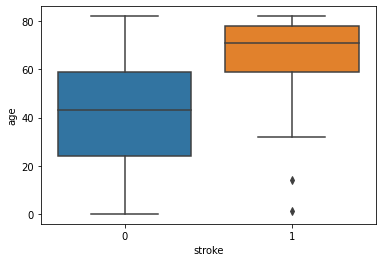

In [124]:
sns.boxplot(x='stroke', y='age', data=dataset)


In [126]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
cont_features = ['age', 'avg_glucose_level', 'bmi']
for f in cat_features + ['stroke']:
    print(f + ':')
    print(dataset[f].value_counts(), '\n')
dataset['stroke'].value_counts(normalize = True)

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

hypertension:
0    4612
1     498
Name: hypertension, dtype: int64 

heart_disease:
0    4834
1     276
Name: heart_disease, dtype: int64 

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64 

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

stroke:
0    4861
1     249
Name: stroke, dtype: int64 



0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [134]:
dataset['smoking_status'].replace('Unknown', np.nan, inplace=True)
for f in cat_features:
    dataset[f] = dataset[f].astype('category')
# set smoking_status to be an ordinal category

dataset['smoking_status'] = dataset['smoking_status'].cat.reorder_categories(new_categories = ['never smoked', 'formerly smoked', 'smokes']).cat.as_ordered()
dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [137]:
dataset.isna().sum()


id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [141]:
na_summary = dataset.isna().sum()
total_count = dataset.shape[0]
print('missing data ratio')
print('bmi:            {:.2f}'.format(na_summary['bmi'] / total_count))
print('smoking_status: {:.2f}'.format(na_summary['smoking_status'] / total_count))

print()
print('missing bmi vs. stroke')
print(dataset[dataset['bmi'].isna()]['stroke'].value_counts())

print()
print('missing smoking_status vs. stroke')
print(dataset[dataset['smoking_status'].isna()]['stroke'].value_counts())

missing data ratio
bmi:            0.04
smoking_status: 0.30

missing bmi vs. stroke
0    161
1     40
Name: stroke, dtype: int64

missing smoking_status vs. stroke
0    1497
1      47
Name: stroke, dtype: int64


In [63]:
#Taking care of BMI's NAN values 
dataset = dataset.fillna(dataset.mean())

In [64]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder
print (dataset['smoking_status'].unique())

# creating instance of labelencoder
labelencoder = LabelEncoder()
# creating initial dataframe
#smoking_statuses = ('formerly smoked','never smoked','smokes','Unknown')
#bridge_df = pd.DataFrame(smoking_statuses, columns=['smoking_status'])


# Assigning numerical values and storing in another column
#Smoking Status 
dataset['smoking_statuses'] = labelencoder.fit_transform(dataset['smoking_status'])
dataset = dataset.drop('smoking_status',axis=1)
#work type
dataset['work_types'] = labelencoder.fit_transform(dataset['work_type'])
dataset = dataset.drop('work_type',axis=1)
#Residence Type
dataset['Residence_types'] = labelencoder.fit_transform(dataset['Residence_type'])
dataset = dataset.drop('Residence_type',axis=1)
#Gender 
dataset['genders'] = labelencoder.fit_transform(dataset['gender'])
dataset = dataset.drop('gender',axis=1)
#Gender 
dataset['Ever_Married'] = labelencoder.fit_transform(dataset['ever_married'])
dataset = dataset.drop('ever_married',axis=1)

dataset

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_statuses,work_types,Residence_types,genders,Ever_Married
0,9046,67.0,0,1,228.69,36.600000,1,1,2,1,1,1
1,51676,61.0,0,0,202.21,28.893237,1,2,3,0,0,1
2,31112,80.0,0,1,105.92,32.500000,1,2,2,0,1,1
3,60182,49.0,0,0,171.23,34.400000,1,3,2,1,0,1
4,1665,79.0,1,0,174.12,24.000000,1,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,2,2,1,0,1
5106,44873,81.0,0,0,125.20,40.000000,0,2,3,1,0,1
5107,19723,35.0,0,0,82.99,30.600000,0,2,3,0,0,1
5108,37544,51.0,0,0,166.29,25.600000,0,1,2,0,1,1


In [65]:
old_cols = dataset.columns.values 
new_cols= ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi','smoking_statuses','work_types','Residence_types','genders','Ever_Married','stroke']
dataset = dataset.reindex(columns=new_cols)
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_statuses,work_types,Residence_types,genders,Ever_Married,stroke
0,67.0,0,1,228.69,36.600000,1,2,1,1,1,1
1,61.0,0,0,202.21,28.893237,2,3,0,0,1,1
2,80.0,0,1,105.92,32.500000,2,2,0,1,1,1
3,49.0,0,0,171.23,34.400000,3,2,1,0,1,1
4,79.0,1,0,174.12,24.000000,2,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,2,2,1,0,1,0
5106,81.0,0,0,125.20,40.000000,2,3,1,0,1,0
5107,35.0,0,0,82.99,30.600000,2,3,0,0,1,0
5108,51.0,0,0,166.29,25.600000,1,2,0,1,1,0


In [69]:
col_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi','smoking_statuses','work_types','Residence_types','genders','Ever_Married']
X = dataset[col_list]
Y = dataset['stroke']
print(X)
print(Y)

       age  hypertension  heart_disease  ...  Residence_types  genders  Ever_Married
0     67.0             0              1  ...                1        1             1
1     61.0             0              0  ...                0        0             1
2     80.0             0              1  ...                0        1             1
3     49.0             0              0  ...                1        0             1
4     79.0             1              0  ...                0        0             1
...    ...           ...            ...  ...              ...      ...           ...
5105  80.0             1              0  ...                1        0             1
5106  81.0             0              0  ...                1        0             1
5107  35.0             0              0  ...                0        0             1
5108  51.0             0              0  ...                0        1             1
5109  44.0             0              0  ...                1    

In [112]:
# Splitting the dataset into the Training set and Test set
#col_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi','smoking_statuses','work_types','Residence_types','genders','Ever_Married']
col_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','Residence_types','genders','Ever_Married']
X = dataset[col_list]
Y = dataset['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

In [113]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier






#Using Logistic Regression Algorithm to the Training Set
models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear'),
          SVC(kernel = 'rbf'),
          GaussianNB(),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
          DecisionTreeClassifier(criterion = 'entropy', ),
          AdaBoostClassifier(n_estimators=100)
          ]

CV = 5 
entries = []
for model in models: 
    counter = 2
    model_name = model.__class__.__name__
    for i in range(len(entries)):
      if (str(model_name) in entries[i]):
       model_name = model_name + "V" + str(counter)
    classifier = model

    clf = classifier.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    entries.append((model_name, accuracy*100))
print(len(entries))
entries

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


8


[('LogisticRegression', 94.60093896713614),
 ('KNeighborsClassifier', 94.36619718309859),
 ('SVC', 94.60093896713614),
 ('SVCV2', 94.60093896713614),
 ('GaussianNB', 87.01095461658842),
 ('RandomForestClassifier', 93.89671361502347),
 ('DecisionTreeClassifier', 91.15805946791862),
 ('AdaBoostClassifier', 94.67918622848201)]

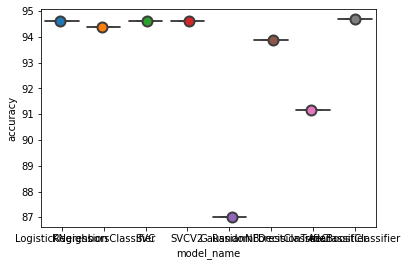

In [114]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

               Specs        Score
0                age  3635.226911
3  avg_glucose_level  1718.285446
2      heart_disease    87.987436
1       hypertension    75.449498
4                bmi    15.894122
5   smoking_statuses     3.369423
6         work_types     2.925901
[0.38 0.   0.01 0.59 0.   0.01 0.01]


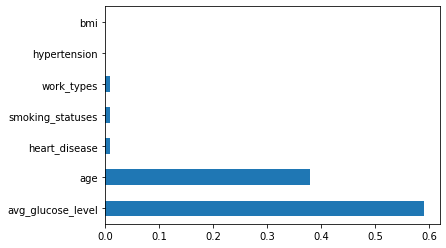

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataset = dataset.reindex(columns=new_cols)

X = dataset.iloc[:,0:7]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

roc_auc_score for DecisionTree:  0.8284664532911379
roc_auc_score for Logistic Regression:  0.8284664532911379


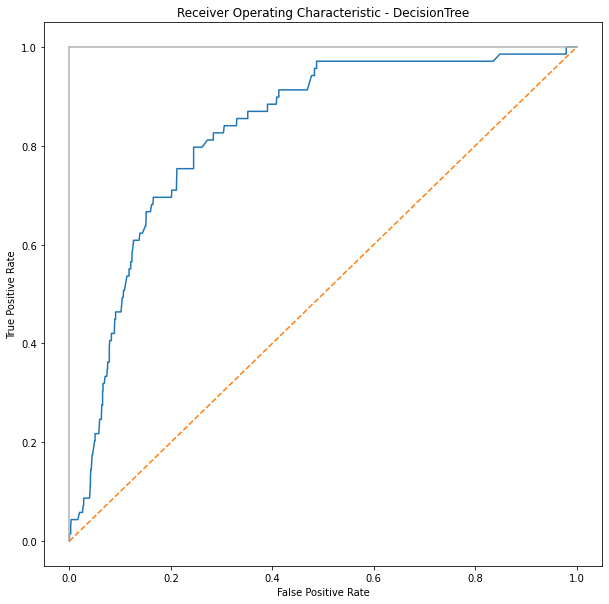

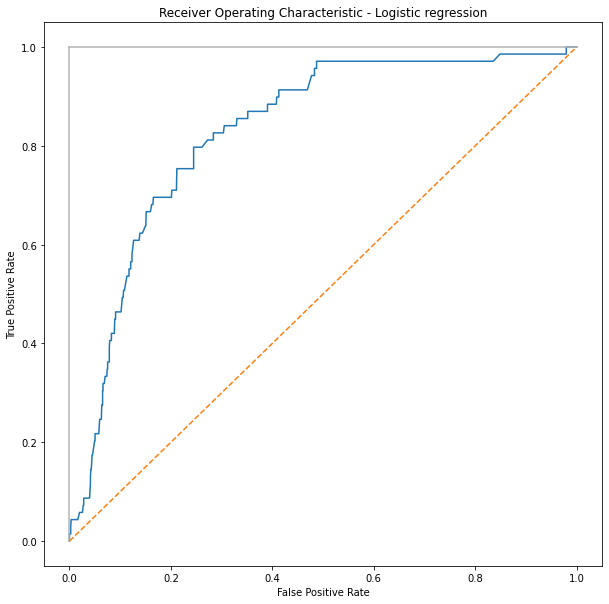

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score
# Getting predicted probabilities
y_score1 = model.predict_proba(X_test)[:,1]
y_score2 = model.predict_proba(X_test)[:,1]

# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [118]:

#training a logistics regression model
logmodel = SVC()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))

Accuracy = 0.9460093896713615


In [119]:
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))
import sklearn.metrics as sk_metrics
import seaborn as sns
from sklearn.metrics import classification_report

target_names = ['Negative','Positive']

print(classification_report(y_test,predictions.round(),target_names=target_names))
matrix = confusion_matrix(predictions.round(), y_test,)

print(matrix)

Accuracy = 0.9460093896713615
              precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      1209
    Positive       0.00      0.00      0.00        69

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278

[[1209   69]
 [   0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: ignored